In [37]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from numpy import isnan
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
import matplotlib

# Fraud Analysis Project

### Comparing 3 diffent algorithms

- Adaboost

- Xgboost

- Lightgbm

## Note
Due to high imbalanced dataset we focus on roc auc/ precision recal curves

In [2]:
#read csv
df=pd.read_csv("creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#count target values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

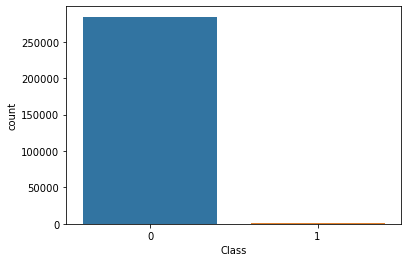

In [6]:
#countplot
sns.countplot(data=df,x='Class')

<AxesSubplot:>

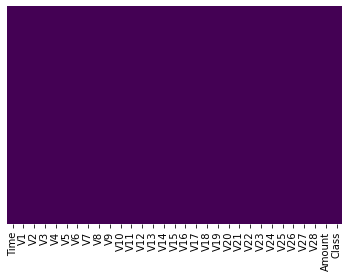

In [7]:
#check nan values in df columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

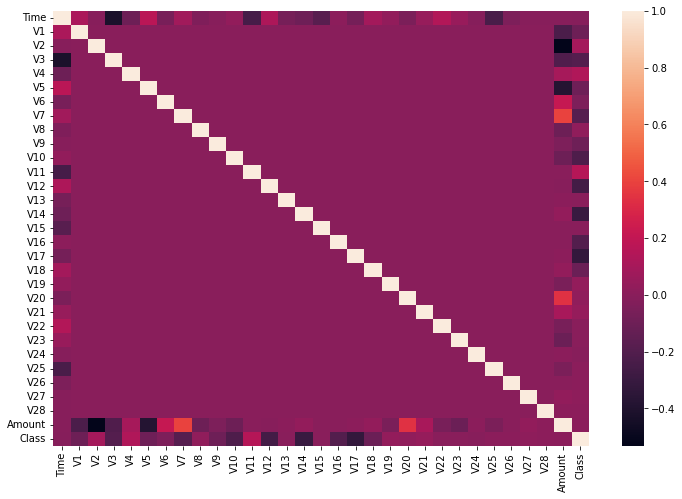

In [8]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [9]:
#check duplicates
bool_series = df.duplicated()

In [10]:
bool_series.value_counts()

False    283726
True       1081
dtype: int64

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
#store classifiers information
comparison_df=pd.DataFrame(columns=['Method','Score_Auc','Score_F1','Time'])

In [13]:
comparison_df

,Method,Score_Auc,Score_F1,Time


In [14]:
#setting X and y
X = df.drop(columns=['Class'])
y = df['Class']

In [15]:
#train test split and oversampling with smote
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
oversample = SMOTE()
X_smote,y_smote=oversample.fit_resample(X_train,y_train)

# Adaboost

In [16]:
#adaboost model run
model = AdaBoostClassifier()
start = time.time()
model.fit(X_smote,y_smote)
stop = time.time()
ada_time = stop - start
print(ada_time)
ada_probs = model.predict_proba(X_test)
ada_probs = ada_probs[:, 1]
y_pred = model.predict(X_test)
ada_precision, ada_recall, _ = precision_recall_curve(y_test, ada_probs)
ada_f1, ada_auc = f1_score(y_test, y_pred), auc(ada_recall, ada_precision)
print (classification_report(y_test,y_pred))
print('Adaboost: f1=%.3f auc=%.3f' % (ada_f1, ada_auc))

69.66238498687744
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84993
           1       0.12      0.84      0.21       125

    accuracy                           0.99     85118
   macro avg       0.56      0.92      0.60     85118
weighted avg       1.00      0.99      0.99     85118

Adaboost: f1=0.208 auc=0.739


In [17]:
comparison_df=comparison_df.append({'Method': "Adaboost",'Score_Auc': ada_auc, 'Score_F1' : ada_f1 , 'Time' : ada_time},ignore_index=True)

C:\Users\schek\AppData\Local\Temp\ipykernel_10544\479427315.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df=comparison_df.append({'Method': "Adaboost",'Score_Auc': ada_auc, 'Score_F1' : ada_f1 , 'Time' : ada_time},ignore_index=True)


In [18]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Adaboost,0.739348,0.208127,69.662385


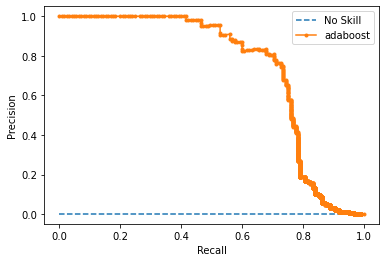

In [19]:
#precision recall curve
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(ada_recall, ada_precision, marker='.', label='adaboost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
AdaBoost:  ROC AUC=0.968


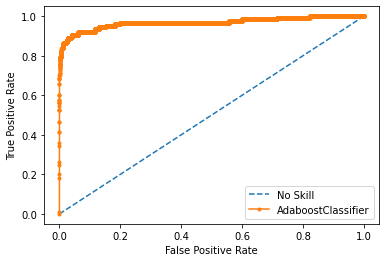

In [20]:
#roc auc curve
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model=AdaBoostClassifier()
model.fit(X_smote,y_smote)
# predict probabilities
ada_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ada_probs = ada_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
ada_roc = roc_auc_score(y_test, ada_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('AdaBoost:  ROC AUC=%.3f' % (ada_roc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ada_fpr, ada_tpr, marker='.', label='AdaboostClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Text(0.5, 257.44, 'Predicted label')

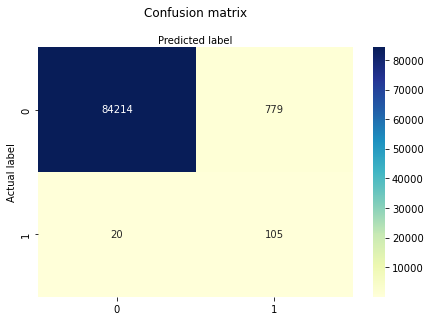

In [21]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# XGBoost

In [22]:
model = XGBClassifier(learning_rate= 0.1,max_depth=7,n_estimators=180)
start = time.time()
model.fit(X_smote,y_smote)
stop = time.time()
xgb_time = stop - start
print(xgb_time)
XGB_probs = model.predict_proba(X_test)
XGB_probs = XGB_probs[:, 1]
y_pred = model.predict(X_test)
XGB_precision, XGB_recall, _ = precision_recall_curve(y_test, XGB_probs)
XGB_f1, XGB_auc = f1_score(y_test,y_pred), auc(XGB_recall, XGB_precision)
print (classification_report(y_test,y_pred))
print('XGBoost: f1=%.3f auc=%.3f' % (XGB_f1, XGB_auc))

C:\Users\schek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\schek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:05:30] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
39.70319724082947
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.78      0.78      0.78       125

    accuracy                           1.00     85118
   macro avg       0.89      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118

XGBoost: f1=0.784 auc=0.809


In [23]:
comparison_df=comparison_df.append({'Method': "Xgboost",'Score_Auc': XGB_auc, 'Score_F1' : XGB_f1 , 'Time' : xgb_time},ignore_index=True)

C:\Users\schek\AppData\Local\Temp\ipykernel_10544\2644877476.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df=comparison_df.append({'Method': "Xgboost",'Score_Auc': XGB_auc, 'Score_F1' : XGB_f1 , 'Time' : xgb_time},ignore_index=True)


In [24]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Adaboost,0.739348,0.208127,69.662385
1,Xgboost,0.809459,0.784,39.703197


Text(0.5, 257.44, 'Predicted label')

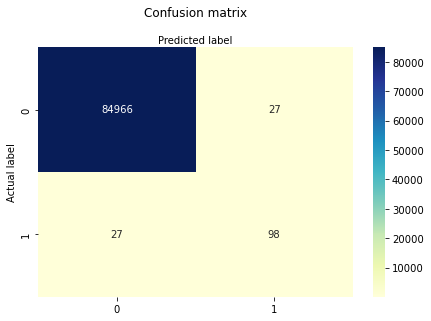

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

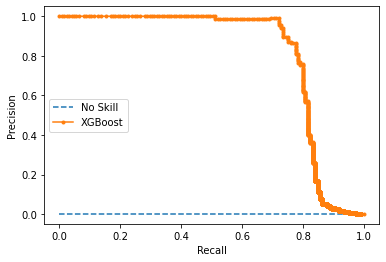

In [26]:
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(XGB_recall, XGB_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\schek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\schek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:06:10] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
No Skill: ROC AUC=0.500
XGB:  ROC AUC=0.970


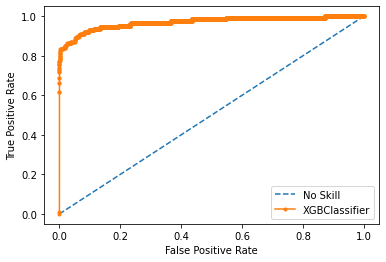

In [27]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = XGBClassifier()
model.fit(X_train,y_train)
# predict probabilities
xgb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB:  ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Lightgbm

In [28]:
model = LGBMClassifier()
start = time.time()
model.fit(X_smote,y_smote)
stop = time.time()
lgb_time = stop - start
print(lgb_time)
lgb_probs = model.predict_proba(X_test)
lgb_probs = lgb_probs[:, 1]
y_pred = model.predict(X_test)
lgb_precision, lgb_recall, _ = precision_recall_curve(y_test, lgb_probs)
lgb_f1, lgb_auc = f1_score(y_test, y_pred), auc(lgb_recall, lgb_precision)
print (classification_report(y_test, y_pred))
print('lgboost: f1=%.3f auc=%.3f' % (lgb_f1, lgb_auc))

0.9411797523498535
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.65      0.77      0.70       125

    accuracy                           1.00     85118
   macro avg       0.82      0.88      0.85     85118
weighted avg       1.00      1.00      1.00     85118

lgboost: f1=0.703 auc=0.667


In [29]:
comparison_df=comparison_df.append({'Method': "LGBM",'Score_Auc': lgb_auc, 'Score_F1' : lgb_f1 , 'Time' : lgb_time},ignore_index=True)

C:\Users\schek\AppData\Local\Temp\ipykernel_10544\323166062.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df=comparison_df.append({'Method': "LGBM",'Score_Auc': lgb_auc, 'Score_F1' : lgb_f1 , 'Time' : lgb_time},ignore_index=True)


In [30]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Adaboost,0.739348,0.208127,69.662385
1,Xgboost,0.809459,0.784,39.703197
2,LGBM,0.667413,0.703297,0.94118


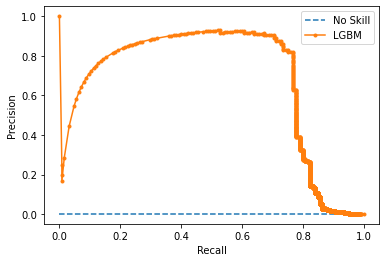

In [31]:
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lgb_recall, lgb_precision, marker='.', label='LGBM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
LBMC:  ROC AUC=0.796


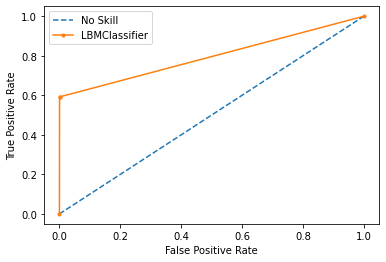

In [32]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LGBMClassifier()
model.fit(X_train,y_train)
# predict probabilities
lgb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lgb_probs = lgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LBMC:  ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lgb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LBMClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

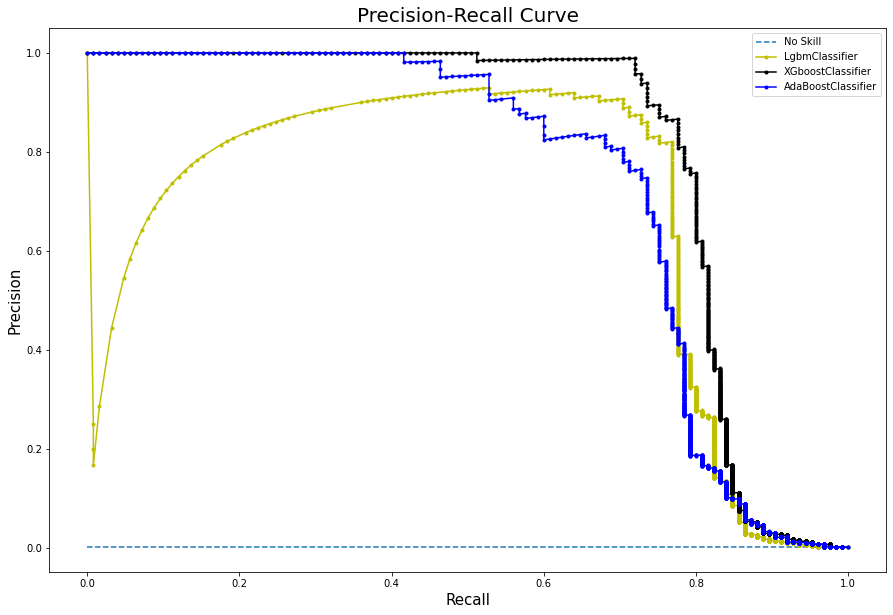

In [38]:
plt.figure(figsize=(15, 10))
matplotlib.pyplot.title("Precision-Recall Curve",fontsize=20)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lgb_recall, lgb_precision,marker='.', c='y', label='LgbmClassifier')
pyplot.plot(XGB_recall, XGB_precision,marker='.', c='k', label='XGboostClassifier')
pyplot.plot(ada_recall, ada_precision,marker='.', c='b', label='AdaBoostClassifier')

# axis labels
pyplot.xlabel('Recall',fontsize=15)
pyplot.ylabel('Precision',fontsize=15)

# show the legend
pyplot.legend()
# show the plot

pyplot.show()

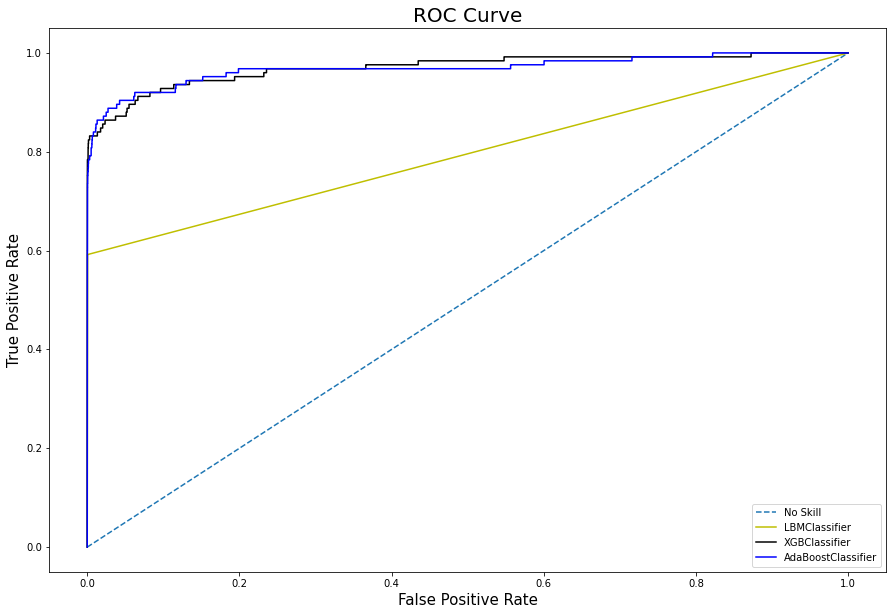

In [39]:
plt.figure(figsize=(15, 10))
matplotlib.pyplot.title("ROC Curve",fontsize=20)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr,linestyle='solid', c='y', label='LBMClassifier')
pyplot.plot(xgb_fpr, xgb_tpr,linestyle='solid', c='k', label='XGBClassifier')
pyplot.plot(ada_fpr, ada_tpr,linestyle='solid', c='b', label='AdaBoostClassifier')

pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)

pyplot.legend()

pyplot.show()

In [40]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Adaboost,0.739348,0.208127,69.662385
1,Xgboost,0.809459,0.784,39.703197
2,LGBM,0.667413,0.703297,0.94118
